# TensorFlow nedir?

TensorFlow, verileri ön işlemek, verileri modellemek ve modelleri sunmak (bunları başkalarının eline almak) için açık kaynaklı bir uçtan uca makine öğrenimi kitaplığıdır.

## Neden TensorFlow kullanmalı?

Makine öğrenimi ve derin öğrenme modellerini sıfırdan oluşturmak yerine, TensorFlow gibi bir kütüphane kullanmanız daha olasıdır. Bunun nedeni, kullanmak isteyeceğiniz en yaygın makine öğrenimi işlevlerinin çoğunu içermesidir.

## Çalışma Dosyasının İçeriği:

TensorFlow çok geniş. Ancak ana öncül basittir: verileri sayılara (tensörlere) dönüştürün ve içlerinde kalıpları bulmak için makine öğrenimi algoritmaları oluşturun.

- Tensörlere giriş (tensör oluşturma)
- Tensörlerden bilgi alma (tensör özellikleri)
- Tensörleri manipüle etme (tensör işlemleri)
- Tensörler ve NumPy
- @Tf.function kullanma (normal Python işlevlerinizi hızlandırmanın bir yolu)
- GPU'ları TensorFlow ile Kullanma
- Denemek için egzersizler

https://www.tensorflow.org/api_docs/python/

In [ ]:
# Tensorflow'a Giriş

import tensorflow as tf
print(tf.__version__)

2.15.0


shift + space ile docstring açılabilir.

Kendiniz tensörler oluşturamazsınız. Bunun nedeni, TensorFlow'un veri kaynaklarınızı okuyabilen ve bunları otomatik olarak tensörlere dönüştürebilen yerleşik modüllere (tf.io ve tf.data gibi) sahip olması ve daha sonra sinir ağı modellerinin bunları bizim için işlemesidir.

Ama şimdilik, tensörlerin kendilerine ve onları nasıl manipüle edeceğimize aşina olduğumuz için, onları kendimiz nasıl oluşturabileceğimizi göreceğiz.

Tf.constant() kullanarak başlayacağız. Sabit oluşturulur.

Bir skaler, sıra 0 tensörü olarak bilinir. Çünkü boyutları yok (sadece bir sayı).

Tensörlerin sınırsız bir boyut aralığına sahip olabilir (tam miktar, temsil ettiğiniz verilere bağlı olacaktır).

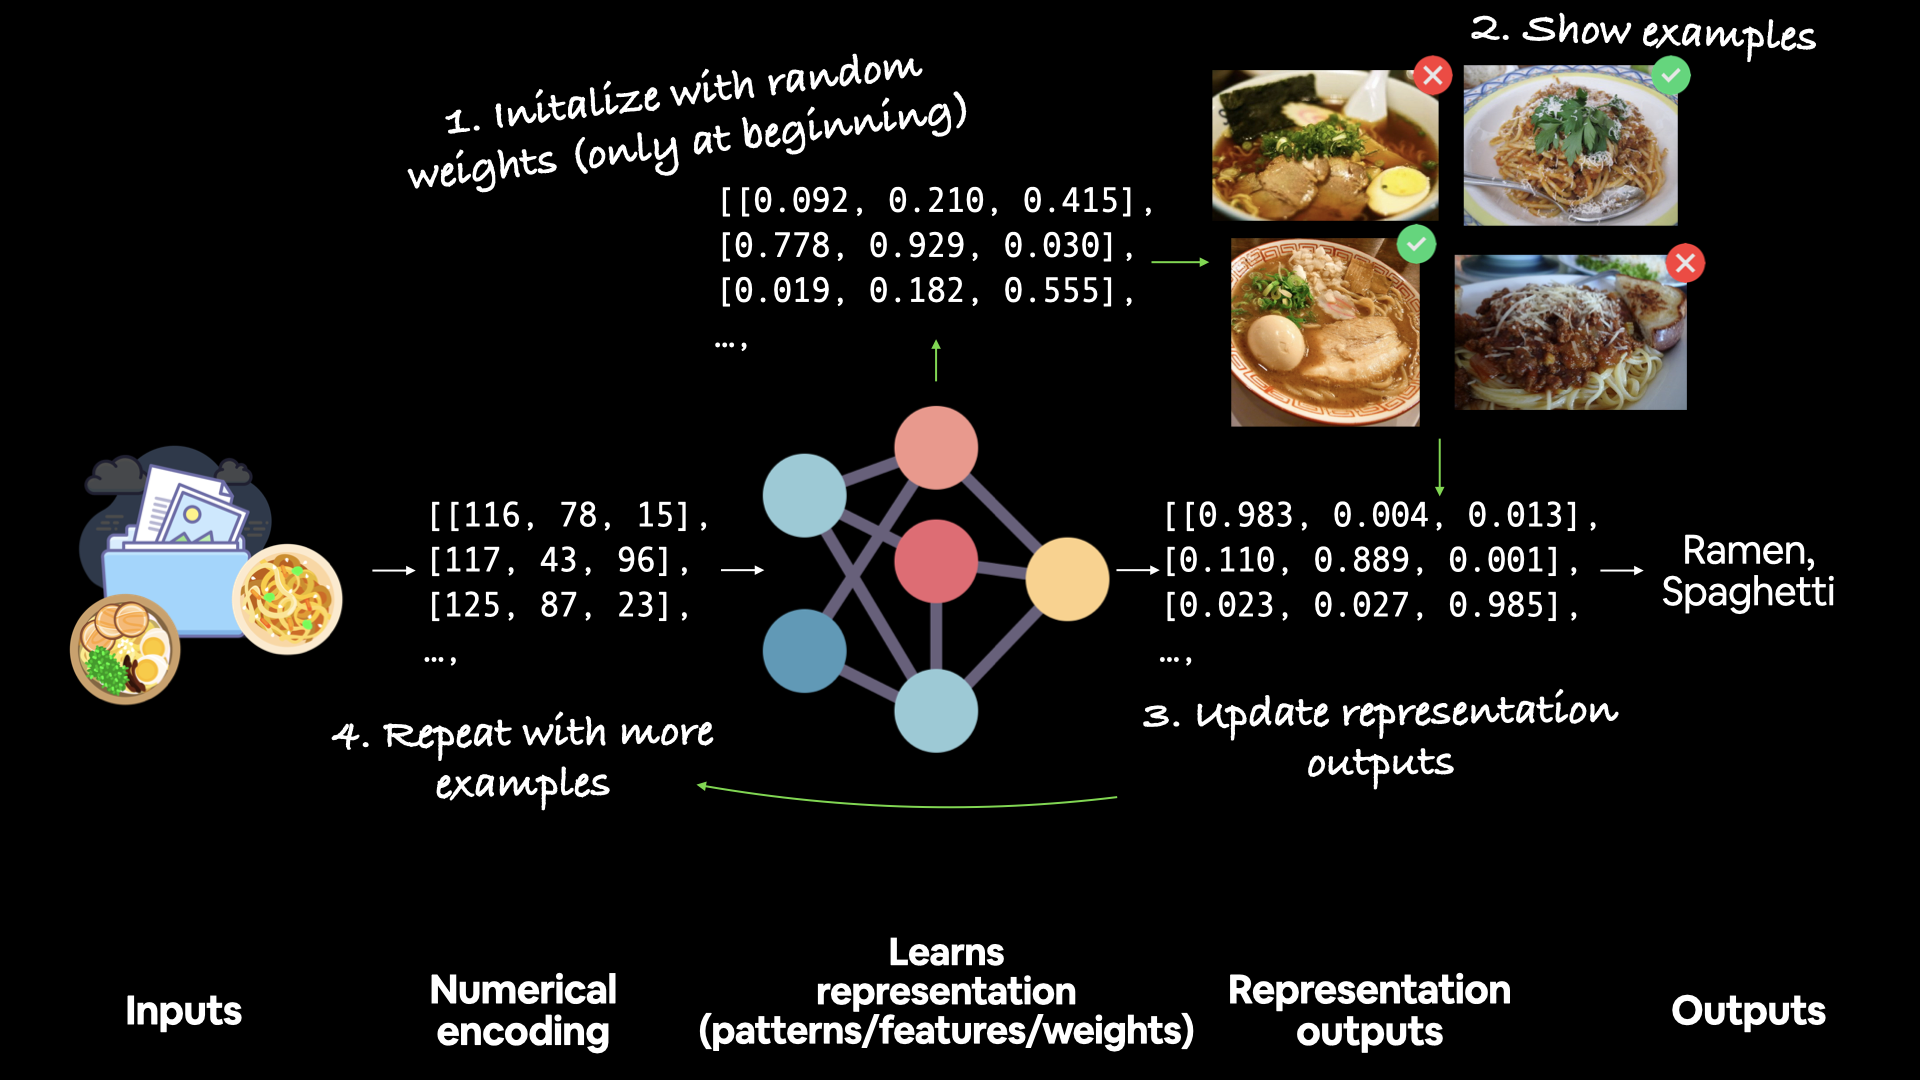

In [ ]:
from IPython.display import display, Image

# Resmin URL'si
image_url = "https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/00-how-a-network-learns.png"

# Resmi göster
display(Image(image_url))


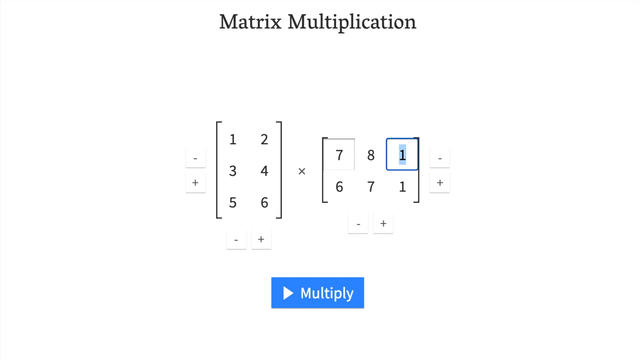

In [ ]:
from IPython.display import display, Image

# Resmin URL'si
image_url = "https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/00-matrix-multiply-crop.gif"

# Resmi göster
display(Image(image_url))


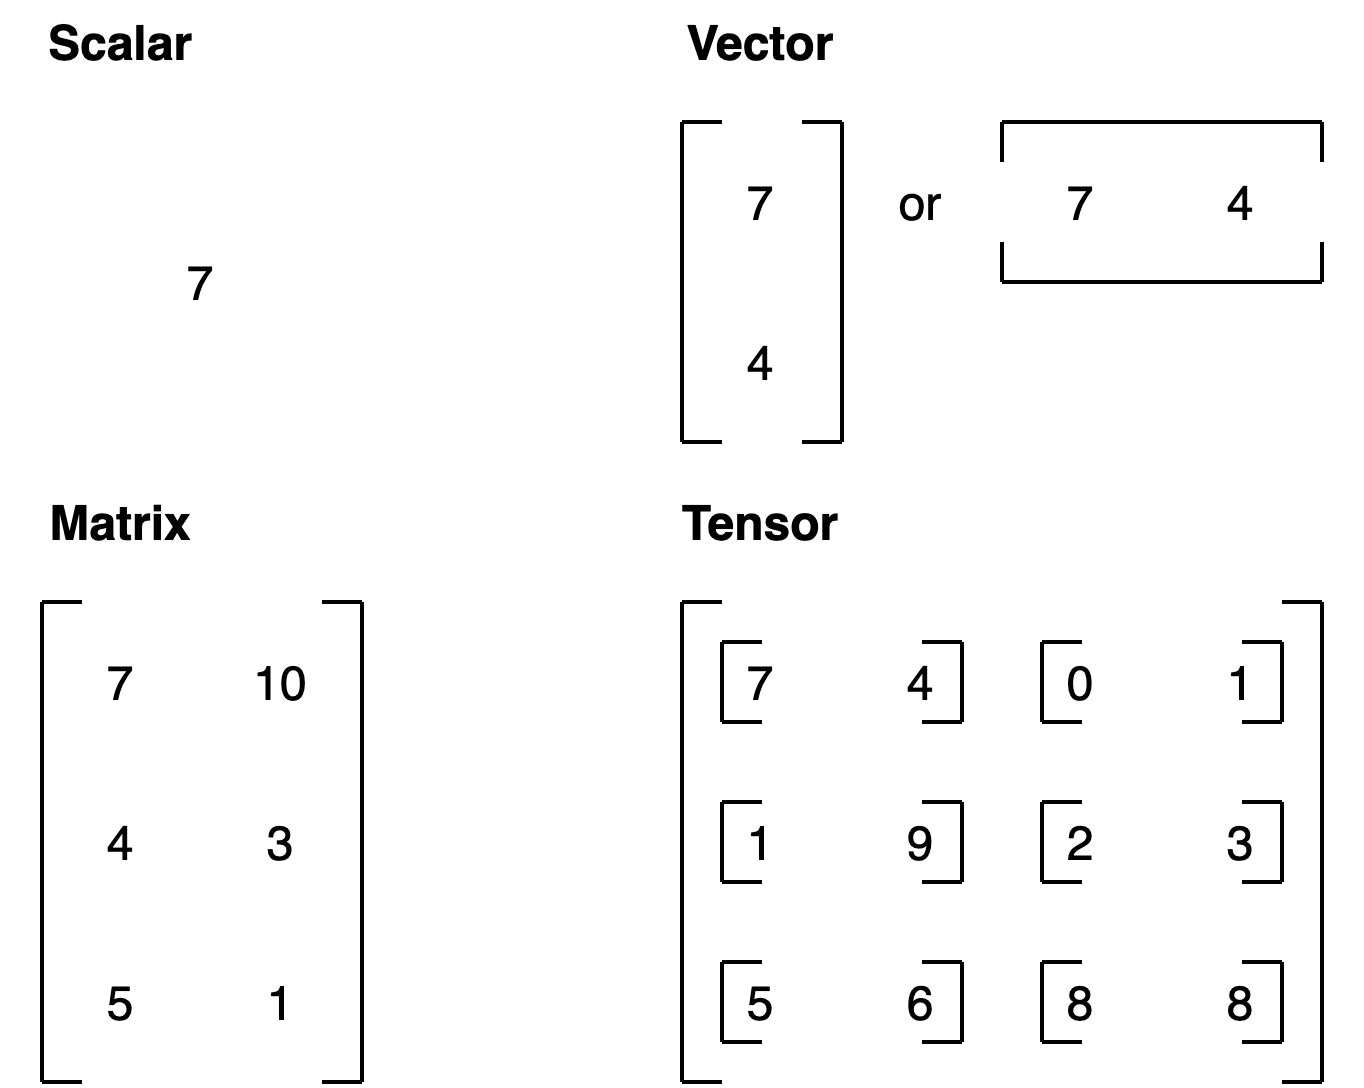

In [ ]:
from IPython.display import display, Image

# Resmin URL'si
image_url = "https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/00-scalar-vector-matrix-tensor.png"

# Resmi göster
display(Image(image_url))


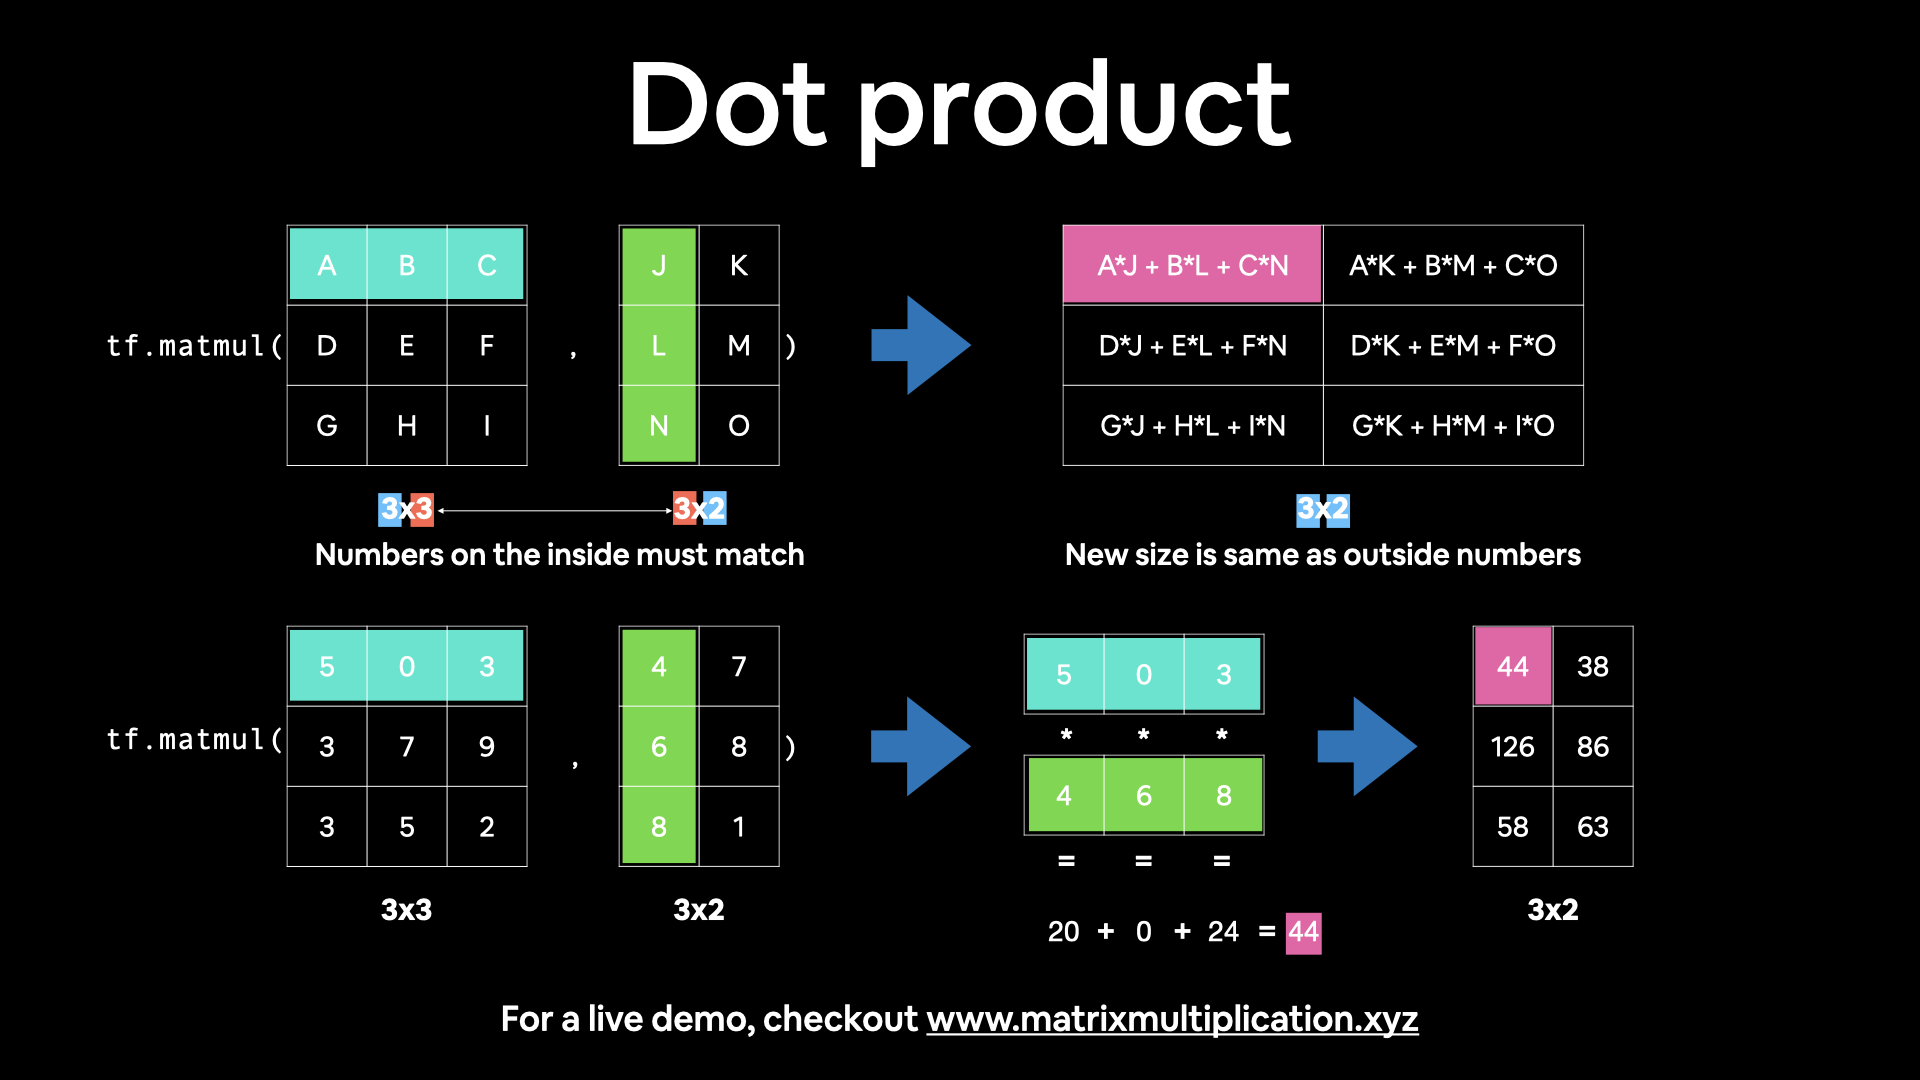

In [ ]:
from IPython.display import display, Image

# Resmin URL'si
image_url = "https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/00-lining-up-dot-products.png"

# Resmi göster
display(Image(image_url))


In [ ]:
# Make tensors with tf.constant()
scalar = tf.constant (7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [ ]:
# Check the number of dimensions of a tensor (ndim stands for number of dimensions)
scalar.ndim

0

ndim --> boyut sayısıdır. Yukarıdaki shape boş idi. O yüzden sıfır.

vectörde bir python dizisi oluşturduk.

In [ ]:
# Make a vector (more than 0 dimensions)
vector = tf.constant([10, 10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [ ]:
# Check the number of dimensions of our vector tensor
vector.ndim

1

10,10 shape (2, ) 2 tek element. O yüzden 1 çıktı.

In [ ]:
# Make a matrix (more than 1 dimension)
matrix = tf.constant([[10, 7],
                      [7, 10]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10]], dtype=int32)>

In [ ]:
matrix.ndim

2

Şekildeki ögelerin sayısı ile ilişkili.

Varsayılan olarak, TensorFlow int32 veya float32 veri türüne sahip tensörler oluşturur.

Bu, 32-bit hassasiyet olarak bilinir (sayı ne kadar yüksekse, sayı o kadar hassas olur, bilgisayarınızda o kadar fazla yer kaplar).

In [ ]:
# Create another matrix and define the datatype
another_matrix = tf.constant([[10., 7.],
                              [3., 2.],
                              [8., 9.]], dtype=tf.float16) # specify the datatype with 'dtype'
another_matrix

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.,  7.],
       [ 3.,  2.],
       [ 8.,  9.]], dtype=float16)>

In [ ]:
# Even though another_matrix contains more numbers, its dimensions stay the same
another_matrix.ndim

2

Toplam boyut sayısı, şekilde kaç öge olduğudur.

In [ ]:
# How about a tensor? (more than 2 dimensions, although, all of the above items are also technically tensors)
tensor = tf.constant([[[1, 2, 3],
                       [4, 5, 6]],
                      [[7, 8, 9],
                       [10, 11, 12]],
                      [[13, 14, 15],
                       [16, 17, 18]]])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]], dtype=int32)>

shape=(3, 2, 3) -->
- ilk başta üç tane var (1'den 6'ya kadar olanı birincisi).
- Sonra iki tane var (her birinde iki dize var).
- En son üç --> her bir dize üç elemandan oluşmuş.

In [ ]:
tensor.ndim

3

Bu, 3. sıra (3 boyutlu) bir tensör olarak bilinir, ancak bir tensör keyfi (sınırsız) bir boyuta sahip olabilir.

Örneğin, bir dizi görüntüyü şekilli (224, 224, 3, 32) tensörlere dönüştürebilirsiniz, burada:

- 224, 224 (ilk 2 boyut) piksel cinsinden görüntülerin yüksekliği ve genişliğidir.
- 3, görüntünün renkli kanallarının sayısıdır (kırmızı, yeşil mavi).
- 32, parti boyutudur (bir sinir ağının herhangi bir seferde gördüğü görüntü sayısı).

Oluşturduğumuz yukarıdaki değişkenlerin tümü aslında tensörlerdir. Ancak farklı isimleri (onlara verdiklerimiz) olarak anıldıklarını da duyabilirsiniz:

- Scaler: tek bir sayı.
- Vektör: yön ile bir sayı (örn. rüzgar hızı ve yönü).
- Matris: 2 boyutlu bir sayı dizisi.
- Tensör: n-boyutlu bir sayı dizisi (burada n herhangi bir sayı olabilir, 0-boyutlu bir tensör bir skalerdir, bir 1-boyutlu tensör bir vektördür).

Karışıklığa eklemek için, matris ve tensör terimleri genellikle birbirinin yerine kullanılır.

TensorFlow kullandığımız için ileriye dönük olarak, başvurduğumuz ve kullandığımız her şey tensör olacaktır.

# İncelemelisin

https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/00_tensorflow_fundamentals.ipynb

https://www.tensorflow.org/api_docs/python/tf/all_symbols

https://www.mathsisfun.com/algebra/scalar-vector-matrix.html

# tf.Variable() ile Tensörler Oluşturma

Ayrıca (muhtemelen nadiren olsanız da, çünkü genellikle verilerle çalışırken, tensörler sizin için otomatik olarak oluşturulur) tf.Variable() kullanarak tensörler oluşturabilirsiniz.

tf.Variable() ve tf.constant() arasındaki fark, tf.constant() ile oluşturulan tensörlerin değişmez olmasıdır (değiştirilemez, yalnızca yeni bir tensör oluşturmak için kullanılabilir), burada tf.Variable() ile oluşturulan tensörler değiştirilebilir (değiştirilebilir).

In [ ]:
# Make the same tensor with tf.Variable() and tf.constant()

changeable_tensor = tf.Variable([10, 7])
unchangeable_tensor = tf.constant([10, 7])
changeable_tensor, unchangeable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>)

Şimdi değiştirilebilir tensörün elemanlarından birini değiştirmeye çalışalım.

In [ ]:
# Will error (requires the .assign() method)
changeable_tensor[0] = 7
changeable_tensor

TypeError: 'ResourceVariable' object does not support item assignment

Bir tf.Variable() tensörünün bir öğesini değiştirmek için assign() yöntemi gerekir.

In [ ]:
# Won't error
changeable_tensor[0].assign(7)
changeable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([7, 7], dtype=int32)>

Şimdi bir tf.constant() tensöründeki bir değeri değiştirmeye çalışalım.

In [ ]:
# Will error (can't change tf.constant())
unchangeable_tensor[0].assign(7)
unchangleable_tensor

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'assign'

Hangisini kullanmalısınız? Tf.constant() veya tf.Variable()?

Sorununuzun ne gerektirdiğine bağlı olacaktır. Bununla birlikte, çoğu zaman, TensorFlow sizin için otomatik olarak seçim yapacaktır (veri yüklerken veya verileri modellerken).

# Rastgele tensörler oluşturma

Rastgele tensörler, rastgele sayılar içeren bazı geçeki boyutlarda tensörlerdir.

Neden rastgele tensörler oluşturmak istersiniz?

Sinir ağlarının, verilerde öğrenmeye çalıştıkları ağırlıklarını (desenlerini) başlatmak için kullandıkları şey budur.

Örneğin, bir sinir ağı öğrenme süreci genellikle rastgele bir n-boyutlu sayı dizisi almayı ve bir tür kalıbı (orijinal verileri temsil etmek için sıkıştırılmış bir yol) temsil edene kadar bunları rafine etmeyi içerir.

tf.random.Generator sınıfını kullanarak rastgele tensörler oluşturabiliriz.

Yüklenen görüntü numpy dizisine dönüşür (numerical encoding). Bu sayısal kodlamayı sinir ağının giriş katmanına geçiririz. Daha sonra sinir ağı kalıplar, özellikler, bekleyen temsiller öğrenebilir. Sonra bu temsil çıktıları (numpy dizisi üretir) ve anlayabileceğimiz şeylere dönüştürür.

Tensörler, rastgele ağırlık başlatır (başlangıçta). Sonra ilk yüklenen fotoğrafın farklı örneklerini gördüğünde temsilini günceller.

normal distribution --> sigma eğrisindeki normal dağılım.

seed =7 yaparsan ikisini de, yine aynı sonuca ulaşırsın.

In [ ]:
# Make two random (but the same) tensors
random_1 = tf.random.Generator.from_seed(42) # set the seed for reproducibility
random_1 = random_1.normal(shape=(3, 2)) # create tensor from a normal distribution
random_2 = tf.random.Generator.from_seed(42)
random_2 = random_2.normal(shape=(3, 2))

# Are they equal?
random_1, random_2, random_1 == random_2

(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=bool, numpy=
 array([[ True,  True],
        [ True,  True],
        [ True,  True]])>)

Yaptığımız rastgele tensörler aslında sözde rastgele sayılardır (rastgele olarak görünürler, ancak gerçekten değiller).

Bir tohum ayarlarsak aynı rastgele sayıları alırız (eğer daha önce NumPy kullandıysanız, bu np.random.seed(42)'ye benzer).

Tohumu ayarlamak, "hey, bazı rastgele sayılar oluşturun, ancak onları X ile tatlandırın" der (X tohumdur).

Tohumu değiştirdiğimizde ne olacağını düşünüyorsun?

https://www.computerhope.com/jargon/p/pseudo-random.htm

In [ ]:
# Make two random (and different) tensors
random_3 = tf.random.Generator.from_seed(42)
random_3 = random_3.normal(shape=(3, 2))
random_4 = tf.random.Generator.from_seed(11)
random_4 = random_4.normal(shape=(3, 2))

# Check the tensors and see if they are equal
random_3, random_4, random_1 == random_3, random_3 == random_4

(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[ 0.27305737, -0.29925638],
        [-0.3652325 ,  0.61883307],
        [-1.0130816 ,  0.28291714]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=bool, numpy=
 array([[ True,  True],
        [ True,  True],
        [ True,  True]])>,
 <tf.Tensor: shape=(3, 2), dtype=bool, numpy=
 array([[False, False],
        [False, False],
        [False, False]])>)

Ya bir tensörün sırasını karıştırmak isteseydin?

Bekle, neden bunu yapmak isteyesin ki?

Diyelim ki 15.000 kedi ve köpek görüntüsüyle çalışıyorsunuz ve ilk 10.000 görüntü kediydi ve sonraki 5.000 köpek görüntüsüydü. Bu sıra, bir sinir ağının nasıl öğrendiğini etkileyebilir (verilerin sırasını öğrenerek aşırı uyum sağlayabilir), bunun yerine verilerinizi hareket ettirmek iyi bir fikir olabilir.

* value --> karıştırılması gereken tensördür.
* seed --> python tam sayı. Dağılım için rastgele seed oluşturmak için kulanılır. tf.random.set_seed bak.
* name --> operasyon adı.

In [ ]:
# Shuffle a tensor (valuable for when you want to shuffle your data)
not_shuffled = tf.constant([[10, 7],
                            [3, 4],
                            [2, 5]])
# Gets different results each time
tf.random.shuffle(not_shuffled)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 3,  4],
       [ 2,  5],
       [10,  7]], dtype=int32)>

In [ ]:
not_shuffled.ndim

2

In [ ]:
not_shuffled

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]], dtype=int32)>

In [ ]:
# Shuffle in the same order every time using the seed parameter (won't acutally be the same)
tf.random.shuffle(not_shuffled, seed=42)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 2,  5],
       [ 3,  4],
       [10,  7]], dtype=int32)>

Bekle... neden sayılar aynı çıkmadı?

Tf.random.set_seed() belgelerinin 4 numaralı kuralından kaynaklanmaktadır.

"4. Hem genel hem de işlem tohumu ayarlanırsa: Her iki tohum da rastgele sırayı belirlemek için birlikte kullanılır."

Tf.random.set_seed(42) genel tohumu ayarlar ve tf.random.shuffle(seed=42) içindeki tohum parametresi işlem tohumunu ayarlar.

Çünkü, "Rastgele bir tohuma dayanan operasyonlar aslında onu iki tohumdan elde eder: küresel ve operasyon düzeyinde tohumlar. Bu, genel tohumu belirler."

In [ ]:
# Shuffle in the same order every time

# Set the global random seed
tf.random.set_seed(42)

# Set the operation random seed
tf.random.shuffle(not_shuffled, seed=42)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]], dtype=int32)>

In [ ]:
# Set the global random seed
tf.random.set_seed(42) # if you comment this out you'll get different results

# Set the operation random seed
tf.random.shuffle(not_shuffled)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 3,  4],
       [ 2,  5],
       [10,  7]], dtype=int32)>

Operasyon düzeyindeki tohumlarla etkileşimleri aşağıdaki gibidir:

* Ne küresel tohum ne de işlem tohumu ayarlanmazsa: Bu op için rastgele seçilmiş bir tohum kullanılır.
* Küresel tohum ayarlanmışsa, ancak işlem tohumu ayarlanmamışsa: Sistem, benzersiz bir rastgele sıra alması için küresel tohumla birlikte deterministik olarak bir işlem tohumu seçer. Tensorflow ve kullanıcı kodunun aynı sürümü içinde bu dizi deterministiktir. Ancak farklı versiyonlarda bu dizi değişebilir. Kod çalışması için belirli tohumlara bağlıysa, hem küresel hem de operasyon düzeyinde tohumları açıkça belirtin.
* İşlem tohumu ayarlanmışsa, ancak genel tohum ayarlanmadıysa: Rastgele sırayı belirlemek için varsayılan bir genel tohum ve belirtilen işlem tohumu kullanılır.
* Hem global hem de işlem tohumu ayarlanırsa: Her iki tohum da rastgele sırayı belirlemek için birlikte kullanılır.

https://www.tensorflow.org/api_docs/python/tf/random/set_seed

# Tensör yapmanın diğer yolları

Bunları nadiren kullansanız da (unutmayın, birçok tensör işlemi sizin için sahne arkasında yapılır), tüm birlerin tensörünü oluşturmak için tf.ones() ve tüm sıfırların tensörünü oluşturmak için tf.zeros() kullanabilirsiniz.

In [ ]:
tf.ones([10,7])

<tf.Tensor: shape=(10, 7), dtype=float32, numpy=
array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]], dtype=float32)>

In [ ]:
# Make a tensor of all ones
tf.ones(shape=(3, 2))

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)>

In [ ]:
# Make a tensor of all zeros
tf.zeros(shape=(3, 2))

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32)>

NumPy dizilerini tensörlere de dönüştürebilirsiniz.

Unutmayın, tensörler ve NumPy dizileri arasındaki temel fark, tensörlerin GPU'larda çalıştırılabilmesidir.

> Not: Bir matris veya tensör tipik olarak büyük harfle temsil edilir (örn. X veya A) burada bir vektör olarak tipik olarak küçük harfle temsil edilir (örneğin y veya b).

In [ ]:
import numpy as np
numpy_A = np.arange(1, 25, dtype=np.int32) # make a NumPy array between 1 and 25
A = tf.constant(numpy_A,
                shape=[2, 4, 3]) # note: the shape total (2*4*3) has to match the number of elements in the array
numpy_A, A

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24], dtype=int32),
 <tf.Tensor: shape=(2, 4, 3), dtype=int32, numpy=
 array([[[ 1,  2,  3],
         [ 4,  5,  6],
         [ 7,  8,  9],
         [10, 11, 12]],
 
        [[13, 14, 15],
         [16, 17, 18],
         [19, 20, 21],
         [22, 23, 24]]], dtype=int32)>)

26 yapsaydın şekil uygunsuzluğundan hata verirdi.

In [ ]:
numpy_A

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)

In [ ]:
numpy_Z = np.arange(1, 25, dtype=np.int32)
A = tf.constant (numpy_Z, shape = (3,8))
B = tf.constant (numpy_Z)
A, B

(<tf.Tensor: shape=(3, 8), dtype=int32, numpy=
 array([[ 1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16],
        [17, 18, 19, 20, 21, 22, 23, 24]], dtype=int32)>,
 <tf.Tensor: shape=(24,), dtype=int32, numpy=
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24], dtype=int32)>)

Bağlantının gitmiş olması durumunda bir hücreye tıkla ve run before seç. Bu hücreden önceki her şey çalıştırılır.

# Tensörlerden bilgi alma (şekil, rütbe, boyut)

Tensörlerinizden farklı bilgi parçaları almak isteyeceğiniz zamanlar olacaktır, özellikle de aşağıdaki tensör kelime dağarcığını bilmelisiniz:

* Şekil (shape): Bir tensörün boyutlarının her birinin uzunluğu (eleman sayısı).
* Sıra (rand): Tensör boyutlarının sayısı. Bir skalerin sırası 0, bir vektörün rütbesi 1'dir, bir matrisin 2. sırasıdır, bir tensörün n sırası n'dir.
* Eksen veya Boyut (axis, dimension): Bir tensörün belirli bir boyutu.
* Boyut (size): Tensördeki toplam öğe sayısı.

- tensor.shape
- tensor.ndim
- tensor[0], tensor [:, 1]
- tf.size (tensor)

Bunları özellikle verilerinizin şekillerini modelinizin şekilleriyle hizalamaya çalışırken kullanacaksınız. Örneğin, görüntü tensörlerinizin şeklinin model giriş katmanınızla aynı şekilde olduğundan emin olmak.

Ndim özelliğini kullanmadan önce bunlardan birini zaten gördük. Gerisini görelim.

In [ ]:
# Create a rank 4 tensor (4 dimensions)
rank_4_tensor = tf.zeros([2, 3, 4, 5])
rank_4_tensor

<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

In [ ]:
rank_4_tensor[0]

<tf.Tensor: shape=(3, 4, 5), dtype=float32, numpy=
array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]], dtype=float32)>

In [ ]:
rank_4_tensor.shape, rank_4_tensor.ndim, tf.size(rank_4_tensor)

(TensorShape([2, 3, 4, 5]), 4, <tf.Tensor: shape=(), dtype=int32, numpy=120>)

In [ ]:
2*3*4*5

120

In [ ]:
# Get various attributes of tensor
print("Datatype of every element:", rank_4_tensor.dtype)
print("Number of dimensions (rank):", rank_4_tensor.ndim)
print("Shape of tensor:", rank_4_tensor.shape)
print("Elements along axis 0 of tensor:", rank_4_tensor.shape[0])
print("Elements along last axis of tensor:", rank_4_tensor.shape[-1])
print("Total number of elements (2*3*4*5):", tf.size(rank_4_tensor).numpy()) # .numpy() converts to NumPy array

Datatype of every element: <dtype: 'float32'>
Number of dimensions (rank): 4
Shape of tensor: (2, 3, 4, 5)
Elements along axis 0 of tensor: 2
Elements along last axis of tensor: 5
Total number of elements (2*3*4*5): 120


In [ ]:
print("Total number of elements (2*3*4*5):", tf.size(rank_4_tensor).numpy())
print("Total number of elements (2*3*4*5):", tf.size(rank_4_tensor))

Total number of elements (2*3*4*5): 120
Total number of elements (2*3*4*5): tf.Tensor(120, shape=(), dtype=int32)


In [ ]:
# Tensörde indexleme aynı Python'daki gibidir.

some_list = [1,2,3,4]
some_list[:2]

[1, 2]

In [ ]:
# Get the first 2 items of each dimension
rank_4_tensor[:2, :2, :2, :2]

<tf.Tensor: shape=(2, 2, 2, 2), dtype=float32, numpy=
array([[[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]]], dtype=float32)>

In [ ]:
# Get the dimension from each index except for the final one
rank_4_tensor[:1, :1, :1, :]

<tf.Tensor: shape=(1, 1, 1, 5), dtype=float32, numpy=array([[[[0., 0., 0., 0., 0.]]]], dtype=float32)>

In [ ]:
rank_4_tensor[:1, :1, :, :1]

<tf.Tensor: shape=(1, 1, 4, 1), dtype=float32, numpy=
array([[[[0.],
         [0.],
         [0.],
         [0.]]]], dtype=float32)>

In [ ]:
rank_4_tensor[:1, :1, :1, :1]

<tf.Tensor: shape=(1, 1, 1, 1), dtype=float32, numpy=array([[[[0.]]]], dtype=float32)>

In [ ]:
# Make a rank 2 tensor (2 dimensions)
rank_2_tensor = tf.constant([[10, 7],
                             [3, 4]])
rank_2_tensor.shape, rank_2_tensor.ndim

(TensorShape([2, 2]), 2)

Tf.newaxis kullanarak aynı bilgileri mevcut tutarken tensörünüze boyutlar da ekleyebilirsiniz.

In [ ]:
some_list, some_list[-1]

([1, 2, 3, 4], 4)

In [ ]:
# Get the last item of each row
rank_2_tensor[:, -1]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([7, 4], dtype=int32)>

In [ ]:
# Add an extra dimension (to the end)
rank_3_tensor = rank_2_tensor[..., tf.newaxis] # in Python "..." means "all dimensions prior to" / her şeye erişim...
rank_2_tensor, rank_3_tensor # shape (2, 2), shape (2, 2, 1)

(<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[10,  7],
        [ 3,  4]], dtype=int32)>,
 <tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
 array([[[10],
         [ 7]],
 
        [[ 3],
         [ 4]]], dtype=int32)>)

In [ ]:
tf.expand_dims(rank_2_tensor, axis=-1) # "-1" means last axis, son ekseni genişletmektir.

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 3],
        [ 4]]], dtype=int32)>

axis: Integer specifying the dimension index at which to expand the shape of input. Given an input of D dimension, axis must be in range [-(D+1), D].

In [ ]:
tf.expand_dims(rank_2_tensor, axis=-0)

<tf.Tensor: shape=(1, 2, 2), dtype=int32, numpy=
array([[[10,  7],
        [ 3,  4]]], dtype=int32)>

In [ ]:
tf.expand_dims(rank_2_tensor, axis=1)

<tf.Tensor: shape=(2, 1, 2), dtype=int32, numpy=
array([[[10,  7]],

       [[ 3,  4]]], dtype=int32)>

In [ ]:
rank_2_tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]], dtype=int32)>

# Tensörleri manipüle etme (tensör işlemleri)

Tensörlerdeki kalıpları bulmak (verilerin sayısal temsili) onları manipüle etmeyi gerektirir.

Yine, TensorFlow'da modeller oluştururken, bu kalıp keşfinin çoğu sizin için yapılır.

## Temel işlemler

Temel matematiksel işlemlerin çoğunu, +, -, * gibi Pyhton operatörlerini kullanarak doğrudan tensörler üzerinde gerçekleştirebilirsiniz.

In [ ]:
# You can add values to a tensor using the addition operator
tensor = tf.constant([[10, 7], [3, 4]])
tensor + 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 17],
       [13, 14]], dtype=int32)>

Tf.constant() kullandığımız için orijinal tensör değişmemiştir (ekleme bir kopya üzerinde yapılır).

In [ ]:
# Original tensor unchanged
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]], dtype=int32)>

In [ ]:
# Multiplication (known as element-wise multiplication)
tensor * 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]], dtype=int32)>

In [ ]:
# Subtraction
tensor - 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 0, -3],
       [-7, -6]], dtype=int32)>

Eşdeğer TensorFlow işlevini de kullanabilirsiniz. TensorFlow işlevini kullanmak (mümkünse), TensorFlow grafiğinin bir parçası olarak çalışırken daha sonra çizginin aşağısında hızlanma avantajına sahiptir.

https://www.tensorflow.org/tensorboard/graphs?hl=tr

In [ ]:
# Use the tensorflow function equivalent of the '*' (multiply) operator
tf.multiply(tensor, 10)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]], dtype=int32)>

In [ ]:
# The original tensor is still unchanged
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]], dtype=int32)>

# Matris çoğaltma

Makine öğrenimi algoritmalarında en yaygın işlemlerden biri matris çarpımıdır.

TensorFlow, bu matris çarpma işlevselliğini tf.matmul() yönteminde uygular.

Matris çarpımının hatırlanması gereken iki ana kural şunlardır:

The inner dimensions must match:
* (3, 5) @ (3, 5) won't work
* (5, 3) @ (3, 5) will work
* (3, 5) @ (5, 3) will work

The resulting matrix has the shape of the outer dimensions:
* (5, 3) @ (3, 5) -> (5, 5)
* (3, 5) @ (5, 3) -> (3, 3)
Note: '@' in Python is the symbol for matrix multiplication.

https://www.mathsisfun.com/algebra/matrix-multiplying.html

In [ ]:
# Matrix multiplication in TensorFlow
print(tensor)
tf.matmul(tensor, tensor)

tf.Tensor(
[[10  7]
 [ 3  4]], shape=(2, 2), dtype=int32)


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

In [ ]:
# Matrix multiplication with Python operator '@'
tensor @ tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

Bu örneklerin her ikisi de işe yarar çünkü tensör değişkenimiz şekillidir (2, 2).

Ya uyumsuz şekilleri olan bazı tensörler yaratsaydık?

In [ ]:
# Create (3, 2) tensor
X = tf.constant([[1, 2],
                 [3, 4],
                 [5, 6]])

# Create another (3, 2) tensor
Y = tf.constant([[7, 8],
                 [9, 10],
                 [11, 12]])
X, Y

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 7,  8],
        [ 9, 10],
        [11, 12]], dtype=int32)>)

In [ ]:
# Try to matrix multiply them (will error)
X @ Y

InvalidArgumentError: {{function_node __wrapped__MatMul_device_/job:localhost/replica:0/task:0/device:CPU:0}} Matrix size-incompatible: In[0]: [3,2], In[1]: [3,2] [Op:MatMul] name: 

Şekli (3,2) olan iki tensörün çarpımı hata verdi çünkü iç ölçüleri uyumlu değildir.

Ya da ihtiyacımız var:
- X'i (2, 3) olarak yeniden şekillendirin, böylece (2, 3) @ (3, 2).
- Y'yi (3, 2) olarak yeniden şekillendirin, böylece (3, 2) @ (2, 3).

Bunu ikisiyle de yapabiliriz:
- Tf.reshape() - bir tensörü tanımlanmış bir şekle yeniden şekillendirmemizi sağlar.
- Tf.transpose() - belirli bir tensörün boyutlarını değiştirir.

Önce tf.reshape()'ı deneyelim.

In [ ]:
# Example of reshape (3, 2) -> (2, 3)
tf.reshape(Y, shape=(2, 3))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[ 7,  8,  9],
       [10, 11, 12]], dtype=int32)>

In [ ]:
# Try matrix multiplication with reshaped Y
X @ tf.reshape(Y, shape=(2, 3))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

In [ ]:
tf.matmul (tf.reshape(X, shape = (2,3)), Y)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 58,  64],
       [139, 154]], dtype=int32)>

In [ ]:
tf.matmul(X,tf.reshape(Y, shape = (2,3)))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

İşe yaradı, yeniden şekillendirilmiş bir X ile aynısını deneyelim, ancak bu sefer tf.transpose() ve tf.matmul() kullanacağız.

In [ ]:
# Example of transpose (3, 2) -> (2, 3)
tf.transpose(X)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 3, 5],
       [2, 4, 6]], dtype=int32)>

In [ ]:
tf.reshape(X, shape=(2,3))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)>

In [ ]:
# Try matrix multiplication
tf.matmul(tf.transpose(X), Y)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

In [ ]:
# You can achieve the same result with parameters
tf.matmul(a=X, b=Y, transpose_a=True, transpose_b=False)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

X'i transpoze ederken veya Y'yi yeniden şekillendirirken ortaya çıkan şekillerdeki farka dikkat edin.

Bunun nedeni yukarıda belirtilen 2. kuraldır:

* (3, 2) @ (2, 3) -> (3, 3) X ile yapılır @ tf.reshape(Y, shape=(2, 3))
* (2, 3) @ (3, 2) -> (2, 2) tf.matmul(tf.transpose(X), Y) ile yapılır

Bu tür bir veri manipülasyonu bir hatırlatmadır: zamanınızın çoğunu makine öğrenimine ve çeşitli işlemlerle (bir modele beslemek gibi) kullanılmak üzere hazırlamak için verileri (tensörler şeklinde) yeniden şekillendiren sinir ağlarıyla çalışarak geçireceksiniz.

# Nokta ürünü (The Dot Product)

Birbirleri ile çarpım matrisleri nokta ürünü olarak da adlandırılır.

Tf.tensordot() kullanarak tf.matmul() işlemini gerçekleştirebilirsiniz.

In [ ]:
# Perform the dot product on X and Y (requires X to be transposed)
tf.tensordot(tf.transpose(X), Y, axes=1)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

Hem yeniden şekillendirme hem de transpoze çalışması kullanmanıza rağmen, her birini kullanırken farklı sonuçlar aldığınızı fark edebilirsiniz.

Bir örnek görelim, önce tf.transpose() ile sonra tf.reshape() ile.

In [ ]:
# Perform matrix multiplication between X and Y (transposed)
tf.matmul(X, tf.transpose(Y))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 23,  29,  35],
       [ 53,  67,  81],
       [ 83, 105, 127]], dtype=int32)>

In [ ]:
# Perform matrix multiplication between X and Y (reshaped)
tf.matmul(X, tf.reshape(Y, (2, 3)))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

Bu garip çünkü Y (a (3x2) matris) ile uğraşırken (2, 3)'e yeniden şekillendirmek ve tranpoze etmek aynı şekilde sonuçlanır.

In [ ]:
# Check shapes of Y, reshaped Y and tranposed Y
Y.shape, tf.reshape(Y, (2, 3)).shape, tf.transpose(Y).shape

(TensorShape([3, 2]), TensorShape([2, 3]), TensorShape([2, 3]))

Ancak Y'de tf.reshape() ve tf.transpose() çağırmak mutlaka aynı değerlerle sonuçlanmaz.

In [ ]:
# Check values of Y, reshape Y and tranposed Y
print("Normal Y:")
print(Y, "\n") # "\n" for newline

print("Y reshaped to (2, 3):")
print(tf.reshape(Y, (2, 3)), "\n")

print("Y transposed:")
print(tf.transpose(Y))

Normal Y:
tf.Tensor(
[[ 7  8]
 [ 9 10]
 [11 12]], shape=(3, 2), dtype=int32) 

Y reshaped to (2, 3):
tf.Tensor(
[[ 7  8  9]
 [10 11 12]], shape=(2, 3), dtype=int32) 

Y transposed:
tf.Tensor(
[[ 7  9 11]
 [ 8 10 12]], shape=(2, 3), dtype=int32)


Gördüğünüz gibi, Y'de çağrıldığında tf.reshape() ve tf.transpose() çıktıları, aynı şekle sahip olsalar bile farklıdır.

Bu, her yöntemin varsayılan davranışıyla açıklanabilir:
- tf.reshape() - verilen tensörün şeklini değiştirin (ilk) ve ardından değerleri göründükleri sıraya ekleyin (bizim durumumuzda, 7, 8, 9, 10, 11, 12).
- tf.transpose() - eksenlerin sırasını değiştirin, varsayılan olarak son eksen ilk olur, ancak sıra perm parametresi kullanılarak değiştirilebilir.

Peki hangisini kullanmalısın?

Yine, çoğu zaman bu işlemler (eğitim sırasında olduğu gibi çalıştırılması gerektiğinde bir sinir ağı sizin için uygulanacaktır).

Ancak genel olarak, bir matris çarpması gerçekleştirdiğinizde ve iki matrisin şekilleri hizalanmadığında, onları hizalamak için bunlardan birini transpoze edersiniz (yeniden şekillendirmezsiniz).

# Matris çarpma ipuçları

Y'yi transpoze edersek, (tranpoze için büyük T'ye dikkat edin) olarak temsil edilir.

Math is Fun ile matris çarpımının açıklayıcı bir görünümünü alın.

https://www.mathsisfun.com/algebra/matrix-multiplying.html

http://matrixmultiplication.xyz/

# Bir tensörün veri tipini değiştirme

Bazen tensörünüzün varsayılan veri türünü değiştirmek isteyeceksiniz.

Bu, daha az hassasiyet kullanarak hesaplamak istediğinizde yaygındır (örn. 16-bit kayan nokta sayıları ve 32-bit kayan nokta sayıları).

Daha az hassasiyetle bilgi işlem, mobil cihazlar gibi daha az bilgi işlem kapasitesine sahip cihazlarda kullanışlıdır (çünkü ne kadar az bit olursa, hesaplamalar o kadar az alan gerektirir).

Tf.cast() kullanarak bir tensörün veri türünü değiştirebilirsiniz.

In [ ]:
# Create a new tensor with default datatype (float32)
B = tf.constant([1.7, 7.4])

# Create a new tensor with default datatype (int32)
C = tf.constant([1, 7])
B, C

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1.7, 7.4], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 7], dtype=int32)>)

In [ ]:
B.dtype, C.dtype

(tf.float32, tf.int32)

In [ ]:
# Change from float32 to float16 (reduced precision)
B = tf.cast(B, dtype=tf.float16)
B

<tf.Tensor: shape=(2,), dtype=float16, numpy=array([1.7, 7.4], dtype=float16)>

In [ ]:
# Change from int32 to float32
C = tf.cast(C, dtype=tf.float32)
C


<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 7.], dtype=float32)>

# Mutlak değeri elde etmek

Bazen tensörlerinizdeki elementlerin mutlak değerlerini (tüm değerler pozitiftir) isteyeceksiniz.

Bunu yapmak için tf.abs() kullanabilirsiniz.

In [ ]:
# Create tensor with negative values
D = tf.constant([-7, -10])
D

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ -7, -10], dtype=int32)>

In [ ]:
# Get the absolute values
tf.abs(D)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 7, 10], dtype=int32)>

# Min, max, ortalama, toplamı bulma (toplama)

Tüm elemanların minimum değeri, maksimum değeri, ortalaması ve toplamı gibi şeyleri bulmak için tensörleri hızlı bir şekilde toplayabilir (bütün bir tensör üzerinde bir hesaplama yapabilirsiniz).

Bunu yapmak için, toplama yöntemleri tipik olarak reduce()_[action] sözdizimine sahiptir, örneğin:
- tf.reduce_min() - bir tensördeki minimum değeri bulun.
- tf.reduce_max() - bir tensördeki maksimum değeri bulun (en yüksek tahmin olasılığını bulmak istediğinizde yardımcı olur).
- tf.reduce_mean() - bir tensördeki tüm elemanların ortalamasını bulun.
- tf.reduce_sum() - bir tensördeki tüm öğelerin toplamını bulun.

Not: tipik olarak, bunların her biri matematik modülünün altındadır, örn. tf.math.reduce_min() ancak tf.reduce_min() takma adını kullanabilirsiniz.

* https://www.tensorflow.org/api_docs/python/tf/math/reduce_min
* https://www.tensorflow.org/api_docs/python/tf/math/reduce_max
* https://www.tensorflow.org/api_docs/python/tf/math/reduce_mean
* https://www.tensorflow.org/api_docs/python/tf/math/reduce_sum
* https://www.tensorflow.org/api_docs/python/tf/math/reduce_std
* https://www.tensorflow.org/api_docs/python/tf/math/reduce_variance

In [ ]:
import numpy as np

# Create a tensor with 50 random values between 0 and 100
E = tf.constant(np.random.randint(low=0, high=100, size=50))
E

<tf.Tensor: shape=(50,), dtype=int64, numpy=
array([77, 38, 59, 97, 74, 42, 31, 82, 59, 47, 86,  0, 98, 55, 45, 12, 94,
       25, 41, 85, 44, 66, 19, 16, 97, 67, 86, 43, 78, 99, 72, 60, 22, 93,
       11, 33, 59, 52, 91, 27, 35, 13, 72, 18, 18, 89,  5, 73, 50, 80])>

In [ ]:
# Find the minimum
tf.reduce_min(E)

<tf.Tensor: shape=(), dtype=int64, numpy=0>

In [ ]:
# Find the maximum
tf.reduce_max(E)

<tf.Tensor: shape=(), dtype=int64, numpy=99>

In [ ]:
# Find the mean
tf.reduce_mean(E)

<tf.Tensor: shape=(), dtype=int64, numpy=54>

In [ ]:
# Find the sum
tf.reduce_sum(E)

<tf.Tensor: shape=(), dtype=int64, numpy=2735>

Benzer yöntemler kullanarak bir tensördeki elemanların standart sapmasını (tf.reduce_std()) ve varyansını (tf.reduce_variance()) da bulabilirsiniz.

In [ ]:
# To find the variance of our tensor, we need to tensorflow_probabilty
import tensorflow_probability as tfp
tfp.stats.variance(E)

<tf.Tensor: shape=(), dtype=int64, numpy=830>

In [ ]:
tf.math.reduce_std(tf.cast(E, dtype = tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=28.807812>

# Konumsal maksimum ve minimumu bulma

Pozisyonu maksimum değerin oluştuğu bir tensör bulmaya ne dersiniz?

Bu, etiketlerinizi (örneğin ['Yeşil', 'Mavi', 'Kırmızı']) tahmin olasılıkları tensörünüzle (örn. [0,98, 0,01, 0,01]).

Bu durumda, tahmin edilen etiket (en yüksek tahmin olasılığına sahip olan) 'Yeşil' olacaktır.

Aşağıdakilerle minimum (gerekirse) için aynısını yapabilirsiniz:
- tf.argmax() - belirli bir tensördeki maksimum öğenin konumunu bulun.
- tf.argmin() - belirli bir tensördeki minimum elemanın konumunu bulun.


Bazı kaynaklar;

* https://www.tensorflow.org/api_docs/python/tf/math/argmax
* https://www.tensorflow.org/api_docs/python/tf/math/argmin

In [ ]:
# Tensor oluşturmanın diğer bir yolu:
tf.random.set_seed(42)
XX = tf.random.uniform(shape = [50])
XX

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
       0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
       0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
       0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
       0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
       0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
       0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
       0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
       0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
       0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
      dtype=float32)>

In [ ]:
# Create a tensor with 50 values between 0 and 1
F = tf.constant(np.random.random(50))
F

<tf.Tensor: shape=(50,), dtype=float64, numpy=
array([0.0330158 , 0.73994595, 0.38848708, 0.54010399, 0.10115926,
       0.47766413, 0.29325232, 0.97433158, 0.39187454, 0.40114353,
       0.75303245, 0.79946005, 0.0746563 , 0.51751963, 0.85889236,
       0.6204532 , 0.00184247, 0.19571537, 0.93393562, 0.01132187,
       0.94989629, 0.7469632 , 0.50344345, 0.48921662, 0.89497843,
       0.05371444, 0.82704941, 0.45500324, 0.38709263, 0.25017631,
       0.96475592, 0.76441846, 0.4765954 , 0.65854768, 0.36219869,
       0.36356213, 0.76718384, 0.17926352, 0.99419814, 0.76069647,
       0.52796981, 0.29942624, 0.40952121, 0.2913796 , 0.28242093,
       0.85097674, 0.07833804, 0.07771703, 0.4207732 , 0.42048355])>

In [ ]:
# Find the maximum element position of F
tf.argmax(F)

<tf.Tensor: shape=(), dtype=int64, numpy=38>

In [ ]:
# index on the largest value position
F[tf.argmax(F)]

<tf.Tensor: shape=(), dtype=float64, numpy=0.9941981437946009>

In [ ]:
# Find the max value of F
tf.reduce_max(F)

<tf.Tensor: shape=(), dtype=float64, numpy=0.9941981437946009>

In [ ]:
F[tf.argmax(F)] == tf.reduce_max(F)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [ ]:
# Find the minimum element position of F
tf.argmin(F)

<tf.Tensor: shape=(), dtype=int64, numpy=14>

In [ ]:
# Find the maximum element position of F
print(f"The maximum value of F is at position: {tf.argmax(F).numpy()}")
print(f"The maximum value of F is: {tf.reduce_max(F).numpy()}")
print(f"Using tf.argmax() to index F, the maximum value of F is: {F[tf.argmax(F)].numpy()}")
print(f"Are the two max values the same (they should be)? {F[tf.argmax(F)].numpy() == tf.reduce_max(F).numpy()}")

The maximum value of F is at position: 47
The maximum value of F is: 0.9991792176768602
Using tf.argmax() to index F, the maximum value of F is: 0.9991792176768602
Are the two max values the same (they should be)? True


# Bir tensörü sıkmak (tüm tek boyutları çıkarmak)

Bir tensörden (boyut 1 olan boyutlar) tek boyutluları kaldırmanız gerekiyorsa, tf.squeeze() kullanabilirsiniz.

Tf.squeeze() - bir tensörden 1'in tüm boyutlarını kaldırın.

https://www.tensorflow.org/api_docs/python/tf/squeeze

Bir beden küçültür.

In [ ]:
# Make a rank 5 (5 dimensions) tensor of 50 numbers between 0 and 100
tf.random.set_seed(42)
G = tf.constant(np.random.randint(0, 100, 50), shape=(1, 1, 1, 1, 50))
G.shape, G.ndim
G

<tf.Tensor: shape=(1, 1, 1, 1, 50), dtype=int64, numpy=
array([[[[[ 0, 94, 19, 17,  8, 29, 81,  0, 70, 25,  1,  1, 33, 86,  1,
           97, 22, 56, 68, 97, 50, 81, 61, 88, 58, 62, 99, 63, 38, 29,
           72, 82,  3, 87, 41, 95,  0, 36, 26,  1, 89, 32, 82, 37, 87,
            8, 74, 99, 63, 77]]]]])>

Başlardaki [[[' lere dikkat et, shape 1111 yapılmıştı.

In [ ]:
# Squeeze tensor G (remove all 1 dimensions)
G_squeezed = tf.squeeze(G)
G_squeezed,G_squeezed.shape, G_squeezed.ndim

(<tf.Tensor: shape=(50,), dtype=int64, numpy=
 array([ 0, 94, 19, 17,  8, 29, 81,  0, 70, 25,  1,  1, 33, 86,  1, 97, 22,
        56, 68, 97, 50, 81, 61, 88, 58, 62, 99, 63, 38, 29, 72, 82,  3, 87,
        41, 95,  0, 36, 26,  1, 89, 32, 82, 37, 87,  8, 74, 99, 63, 77])>,
 TensorShape([50]),
 1)

# Tek sıcak kodlama (One Hot Encoding)

Bir tensör endeksörünüz varsa ve onu tek sıcak kodlamak istiyorsanız, tf.one_hot() kullanabilirsiniz.

Ayrıca derinlik parametresini (bir-sıcak kodlamak istediğiniz seviye) belirtmelisiniz.

red-green-blue

1-0-0

0-1-0

0-0-1

Bir çeşit numerical encoding. Diyelim ki sarı, kırmızı ve yeşil renkler var. Bunları renklerine göre sinir ağına aktarmak istersin.

https://www.tensorflow.org/api_docs/python/tf/one_hot

In [ ]:
# Make a list of indices
some_list = [0, 1, 2, 3] # sarı, kırmızı, yeşil vs de yazabilirdin.

# One hot encode them
tf.one_hot(some_list, depth=4)

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

ilki 0 idi, 0'a denk gelen yer 1 oldu. İkincisi 1 idi. İkinci satırda 1'e denk gelen yer 1 oldu, kalanlar 0.

4 kalem olduğu için depth 4...

Varsayılan 0 ve 1 yerine on_value ve off_value değerlerini de belirtebilirsiniz.

In [ ]:
# Specify custom values for on and off encoding
tf.one_hot(some_list, depth=4, on_value="We're live!", off_value="Offline")

<tf.Tensor: shape=(4, 4), dtype=string, numpy=
array([[b"We're live!", b'Offline', b'Offline', b'Offline'],
       [b'Offline', b"We're live!", b'Offline', b'Offline'],
       [b'Offline', b'Offline', b"We're live!", b'Offline'],
       [b'Offline', b'Offline', b'Offline', b"We're live!"]], dtype=object)>

# Kareleme, kütük, karekök

Bir aşamada gerçekleştirmek istediğiniz diğer birçok yaygın matematiksel işlem muhtemelen mevcuttur.

- tf.square() - bir tensördeki her değerin karesini al.
- tf.sqrt() - bir tensördeki her değerin karekökünü alır (not: öğelerin float olması gerekir, aksi takdirde bu hata verir).
- tf.math.log() - bir tensördeki her değerin doğal günlüğünü alın (öğelerin yüzmesi gerekir).

Bazı kaynaklar;

* https://www.tensorflow.org/api_docs/python/tf/math/square
* https://www.tensorflow.org/api_docs/python/tf/math/sqrt
* https://www.tensorflow.org/api_docs/python/tf/math/log

In [ ]:
# Create a new tensor
H = tf.constant(np.arange(1, 10))
H

<tf.Tensor: shape=(9,), dtype=int64, numpy=array([1, 2, 3, 4, 5, 6, 7, 8, 9])>

In [ ]:
# Square it
tf.square(H)

<tf.Tensor: shape=(9,), dtype=int64, numpy=array([ 1,  4,  9, 16, 25, 36, 49, 64, 81])>

In [ ]:
# Find the squareroot (will error), needs to be non-integer
tf.sqrt(H)

InvalidArgumentError: Value for attr 'T' of int64 is not in the list of allowed values: bfloat16, half, float, double, complex64, complex128
	; NodeDef: {{node Sqrt}}; Op<name=Sqrt; signature=x:T -> y:T; attr=T:type,allowed=[DT_BFLOAT16, DT_HALF, DT_FLOAT, DT_DOUBLE, DT_COMPLEX64, DT_COMPLEX128]> [Op:Sqrt] name: 

In [ ]:
# Change H to float32
H = tf.cast(H, dtype=tf.float32)
H

<tf.Tensor: shape=(9,), dtype=float32, numpy=array([1., 2., 3., 4., 5., 6., 7., 8., 9.], dtype=float32)>

In [ ]:
# Find the square root
tf.sqrt(H)

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([1.       , 1.4142135, 1.7320508, 2.       , 2.236068 , 2.4494898,
       2.6457512, 2.828427 , 3.       ], dtype=float32)>

In [ ]:
# Find the log (input also needs to be float)
tf.math.log(H)

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([0.       , 0.6931472, 1.0986123, 1.3862944, 1.609438 , 1.7917595,
       1.9459102, 2.0794415, 2.1972246], dtype=float32)>

# tf. Değişken tensörleri manipüle etmek

tf.Variable() ile oluşturulan tensörler, aşağıdaki gibi yöntemler kullanılarak yerinde değiştirilebilir:
* .assign() - bir değişken tensörünün belirli bir dizinine farklı bir değer atayın.
* .add_assign() - mevcut bir değere ekleyin ve bir değişken tensörünün belirli bir dizinine yeniden atayın.

Bazı kaynaklar;
* https://www.tensorflow.org/api_docs/python/tf/Variable#assign
* https://www.tensorflow.org/api_docs/python/tf/Variable#assign_add

In [ ]:
# Create a variable tensor
I = tf.Variable(np.arange(0, 5))
I

<tf.Variable 'Variable:0' shape=(5,) dtype=int64, numpy=array([0, 1, 2, 3, 4])>

In [ ]:
# Assign the final value a new value of 50
I.assign([0, 1, 2, 3, 50])

<tf.Variable 'UnreadVariable' shape=(5,) dtype=int64, numpy=array([ 0,  1,  2,  3, 50])>

In [ ]:

# The change happens in place (the last value is now 50, not 4)
I

<tf.Variable 'Variable:0' shape=(5,) dtype=int64, numpy=array([ 0,  1,  2,  3, 50])>

In [ ]:
# Add 10 to every element in I
I.assign_add([10, 10, 10, 10, 10])

<tf.Variable 'UnreadVariable' shape=(5,) dtype=int64, numpy=array([10, 11, 12, 13, 60])>

In [ ]:
# Again, the change happens in place
I

<tf.Variable 'Variable:0' shape=(5,) dtype=int64, numpy=array([10, 11, 12, 13, 60])>

# Tensör ve NumPy

Tensörler oluşturmak için NumPy dizilerini kullanmak gibi NumPy dizileriyle etkileşime giren bazı tensör örnekleri gördük.

Tensörler ayrıca aşağıdakiler kullanılarak NumPy dizilerine dönüştürülebilir:
* np.array() - bir ndarray'e (NumPy'nin ana veri türü) dönüştürmek için bir tensör geçirir.
* tensor.numpy() - bir ndrray'e dönüştürmek için bir tensörde çağrı.

Bunu yapmak, tensörleri yinelenebilir hale getirdiği ve üzerinde NumPy'nin herhangi bir yöntemini kullanmamıza izin verdiği için yararlıdır.

In [ ]:
# Create a tensor from a NumPy array
J = tf.constant(np.array([3., 7., 10.]))
J

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 3.,  7., 10.])>

In [ ]:
# Convert tensor J to NumPy with np.array()
np.array(J), type(np.array(J))

(array([ 3.,  7., 10.]), numpy.ndarray)

In [ ]:
# Convert tensor J to NumPy with .numpy()
J.numpy(), type(J.numpy())

(array([ 3.,  7., 10.]), numpy.ndarray)

Varsayılan olarak tensörler dtype=float32'ye sahiptir, burada NumPy dizileri dtype=float64'e sahiptir.

Bunun nedeni, sinir ağlarının (genellikle TensorFlow ile oluşturulmuştur) genellikle daha az hassasiyetle (64-bit yerine 32-bit) çok iyi çalışabilmesidir.

In [ ]:
# Make a tensor from NumPy and from an array
numpy_J = tf.constant(np.array([3., 7., 10.])) # will be float64 (due to NumPy)
tensor_J = tf.constant([3., 7., 10.]) # will be float32 (due to being TensorFlow default)
numpy_J.dtype, tensor_J.dtype

(tf.float64, tf.float32)

# @tf.function kullanma

TensorFlow maceralarınızda, dekoratör @tf.function'a sahip Python işlevleriyle karşılaşabilirsiniz.

Python dekoratörlerinin ne yaptığından emin değilseniz, RealPython'un üzerlerindeki kılavuzu okuyun.

Ama kısacası, dekoratörler bir işlevi şu ya da bu şekilde değiştirir.

@tf.function dekoratör durumunda, bir Python işlevini çağrılabilir bir TensorFlow grafiğine dönüştürür. Bu, kendi Python işlevinizi yazdıysanız ve @tf.function ile süslüyorsanız, kodunuzu dışa aktardığınızda (potansiyel olarak başka bir cihazda çalıştırmak için), TensorFlow bunu kendisinin hızlı (er) bir sürümüne dönüştürmeye çalışacaktır (bir hesaplama grafiğinin parçası haline getirerek).

Bununla ilgili daha fazla bilgi için, tf.function kılavuzuyla daha iyi performans kılavuzunu okuyun.

* https://realpython.com/primer-on-python-decorators/
* https://www.tensorflow.org/guide/function?hl=tr

In [ ]:
# Create a simple function
def function(x, y):
  return x ** 2 + y

x = tf.constant(np.arange(0, 10))
y = tf.constant(np.arange(10, 20))
function(x, y)

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([ 10,  12,  16,  22,  30,  40,  52,  66,  82, 100])>

In [ ]:
# Create the same function and decorate it with tf.function
@tf.function
def tf_function(x, y):
  return x ** 2 + y

tf_function(x, y)


<tf.Tensor: shape=(10,), dtype=int64, numpy=array([ 10,  12,  16,  22,  30,  40,  52,  66,  82, 100])>

Yukarıdaki iki işlev (dekore edilmiş olan ve dekore edilmemiş olan) arasında bir fark fark etmediyseniz haklısınız.

Farkın çoğu perde arkasında oluyor. Ana olanlardan biri, mümkün olduğunda potansiyel kod hızlandırmalarıdır.

# GPU'lara erişim bulma

Bu dizüstü bilgisayar boyunca GPU'lardan birçok kez bahsettik.

Peki müsait olup olmadığını nasıl kontrol edersin?

Tf.config.list_physical_devices() kullanarak bir GPU'ya erişiminiz olup olmadığını kontrol edebilirsiniz.

https://www.tensorflow.org/guide/gpu?hl=tr

In [ ]:
print(tf.config.list_physical_devices('GPU'))

[]


Yukarıdaki boş bir dizi (veya hiçbir şey) çıkarsa, bu bir GPU'ya erişiminiz olmadığı anlamına gelir (veya en azından TensorFlow onu bulamaz).

Google Colab'da çalışıyorsanız, Çalışma Zamanı -> Çalışma Zamanı Türünü Değiştir -> GPU'yu Seç'e giderek bir GPU'ya erişebilirsiniz (not: bunu yaptıktan sonra not defteriniz yeniden başlayacak ve kaydettiğiniz tüm değişkenler kaybolacaktır).

Çalışma zamanı türünüzü değiştirdikten sonra aşağıdaki hücreyi çalıştırın.

In [ ]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[]


If you've got access to a GPU, the cell above should output something like:

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

You can also find information about your GPU using !nvidia-smi.

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


 Note: If you have access to a GPU, TensorFlow will automatically use it whenever possible.

Boş zamanında deneme amaçlı aşağıdaki denemeleri yap.

* tf.constant() kullanarak seçtiğiniz değerlerle bir vektör, skaler, matris ve tensör oluşturun.
* 1'de oluşturduğunuz tensörlerin şeklini, sırasını ve boyutunu bulun.
* Şekil [5, 300] ile 0 ile 1 arasında rastgele değerler içeren iki tensör oluşturun.
* Matris çarpımı kullanarak 3'te oluşturduğunuz iki tensörü çarpın.
* Oluşturduğunuz iki tensörü nokta ürününü kullanarak 3'te çarpın.
* Şekli [224, 224, 3] ile 0 ile 1 arasında rastgele değerlere sahip bir tensör oluşturun.
* 6'da oluşturduğunuz tensörün min ve max değerlerini bulun.
* Rastgele şekil [1, 224, 224, 3] değerlerine sahip bir tensör oluşturdu ve ardından şekli [224, 224, 3] olarak değiştirmek için sıkıştırın.
* Kendi değer seçiminizi kullanarak şekil [10] ile bir tensör oluşturun, ardından maksimum değere sahip dizini bulun.
* 9'da oluşturduğunuz tensörü tek sıcak kodlar.

Bazı kaynaklar;

TensorFlow Python API'leri listesini okuyun, bu not defterinde geçmediğimiz birini seçin, tersine mühendislik yapın (dokümantasyon kodunu kendiniz yazın) ve ne işe yaradığını anlayın.

https://www.tensorflow.org/api_docs/python/tf/all_symbols

En son market faturanızı hesaplamak için bir dizi tensör işlevi oluşturmaya çalışın (öğelerin adlarını kullanmazsanız sorun değil, sadece fiyatı sayısal biçimde).

Tensörleri kullanarak ay ve yıl için market faturanızı nasıl hesaplarsınız?

https://www.tensorflow.org/tutorials/quickstart/beginner?hl=tr

Yeni başlayanlar için TensorFlow 2.x hızlı başlangıç eğitimini gözden geçirin (anlamasanız bile tüm kodu kendiniz yazdığınızdan emin olun).

Burada kullandığımız, orada kullanılanlarla eşleşen herhangi bir işlev var mı? Hangileri aynı? Hangisini daha önce görmedin?

"Tensör nedir?" videosunu izleyin - bu not defterinde ele aldığımız kavramların çoğuna harika bir görsel giriş.

https://www.youtube.com/watch?v=f5liqUk0ZTw